In [185]:
# ! pip install quandl

In [186]:
import pandas as pd
import quandl, math, datetime
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import pickle
import random

In [187]:
df = quandl.get('WIKI/GOOGL')

In [188]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [189]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

Modifying the dataframe to just the features you need.

In [190]:
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0


In [191]:
df['Percent_Volatility'] = ((df['Adj. High'] - df['Adj. Low']) / df['Adj. Low']) * 100 

calculation of the disparity between the high and low prices

In [192]:
df['Percent_Change'] = ((df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open']) * 100

Calculation of the change between the opening prices at the beginning of the market and the closing of the market.

In [193]:
#           price               x                   x                x
df = df[['Adj. Close', 'Percent_Volatility', 'Percent_Change', 'Adj. Volume']]

Further modification of the dataframe to just the features you need.

In [194]:
df.head()

,Adj. Close,Percent_Volatility,Percent_Change,Adj. Volume
Date,,,,
2004-08-19,50.322842,8.441017,0.324968,44659000.0
2004-08-20,54.322689,8.537313,7.227007,22834300.0
2004-08-23,54.869377,4.062357,-1.227880,18256100.0
2004-08-24,52.597363,7.753210,-5.726357,15247300.0
2004-08-25,53.164113,3.966115,1.183658,9188600.0


In [195]:
forecast_col = 'Adj. Close' # Labelling Adjusted Close as forecast to show that it is your target column and to make it easier to call the column.
df.fillna(-99999, inplace=True) # This tells the computer to fill NAN values with -9999 

In [196]:
forecast_out = int(math.ceil(0.1 * len(df))) # rounding up to the nearest integer 10% of the total length of df would be used for forecast
forecast_out

343

In [197]:
df['label'] = df[forecast_col]. shift(-forecast_out)
# df[forecast_col] is the 'Adj. Close' column
# shift removes the index value parsed into it from the dataset
print(df['label'])

Date
2004-08-19    214.005615
2004-08-20    210.725489
2004-08-23    208.072299
2004-08-24    218.288837
2004-08-25    223.309335
2004-08-26    226.318624
2004-08-27    233.550949
2004-08-30    234.172919
2004-08-31    235.607297
2004-09-01    236.545192
2004-09-02    232.532806
2004-09-03    233.846863
2004-09-07    234.278194
2004-09-08    223.143773
2004-09-09    218.898218
2004-09-10    200.348507
2004-09-13    214.411869
2004-09-14    222.200913
2004-09-15    217.170384
2004-09-16    217.804843
2004-09-17    217.416143
2004-09-20    214.070816
2004-09-21    216.999908
2004-09-22    201.512048
2004-09-23    198.633162
2004-09-24    191.368235
2004-09-27    193.146224
2004-09-28    184.529625
2004-09-29    185.111421
2004-09-30    179.940459
                 ...    
2018-02-13           NaN
2018-02-14           NaN
2018-02-15           NaN
2018-02-16           NaN
2018-02-20           NaN
2018-02-21           NaN
2018-02-22           NaN
2018-02-23           NaN
2018-02-26          

In [198]:
df.head()

,Adj. Close,Percent_Volatility,Percent_Change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,8.441017,0.324968,44659000.0,214.005615
2004-08-20,54.322689,8.537313,7.227007,22834300.0,210.725489
2004-08-23,54.869377,4.062357,-1.227880,18256100.0,208.072299
2004-08-24,52.597363,7.753210,-5.726357,15247300.0,218.288837
2004-08-25,53.164113,3.966115,1.183658,9188600.0,223.309335


In [199]:
df.tail(forecast_out + 5)

,Adj. Close,Percent_Volatility,Percent_Change,Adj. Volume,label
Date,,,,,
2016-11-04,781.10,2.266615,1.270582,1970603.0,1094.00
2016-11-07,802.03,1.526044,0.890622,1992570.0,1053.15
2016-11-08,811.98,2.053475,1.240602,1769069.0,1026.55
2016-11-09,805.59,2.484107,0.468927,3098510.0,1054.09
2016-11-10,780.29,5.444984,-3.667901,5909609.0,1006.94
2016-11-11,771.75,1.534864,-0.651382,3592641.0,NaN
2016-11-14,753.22,3.791068,-2.402301,3688274.0,NaN
2016-11-15,775.16,1.962521,1.265889,2943889.0,NaN
2016-11-16,779.98,2.240549,-0.237900,1798360.0,NaN


In [200]:
df.dropna(inplace=True) # Removes axis(rows) that have NaN
df.tail()

,Adj. Close,Percent_Volatility,Percent_Change,Adj. Volume,label
Date,,,,,
2016-11-04,781.10,2.266615,1.270582,1970603.0,1094.00
2016-11-07,802.03,1.526044,0.890622,1992570.0,1053.15
2016-11-08,811.98,2.053475,1.240602,1769069.0,1026.55
2016-11-09,805.59,2.484107,0.468927,3098510.0,1054.09
2016-11-10,780.29,5.444984,-3.667901,5909609.0,1006.94


### Using numpy to prepare data for analysis

In [201]:
X = np.array(df.drop(['label', 'Adj. Close'], 1)) # removing the label column from the set of features for the X matrix
y = np.array(df['label']) 

In [202]:
print(X)

[[  8.44101709e+00   3.24967503e-01   4.46590000e+07]
 [  8.53731343e+00   7.22700723e+00   2.28343000e+07]
 [  4.06235672e+00  -1.22788010e+00   1.82561000e+07]
 ..., 
 [  2.05347540e+00   1.24060197e+00   1.76906900e+06]
 [  2.48410739e+00   4.68927329e-01   3.09851000e+06]
 [  5.44498392e+00  -3.66790123e+00   5.90960900e+06]]


In [203]:
X = preprocessing.scale(X) # Feature scaling the X values to between -1 and +1
df.dropna(inplace=True) # To remove any value that was turned to Na by the scaling
y = np.array(df['label'])

In [204]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

In [205]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [206]:
# To save the Classifier into a file to be used some other time. 
with open('linearregression.pickle', 'wb') as f:
    pickle.dump(lr, f)

In [207]:
# To use the saved classifier for another document:
# pickle_in = ('linearRegression.pickle', 'rb')
# lr = pickle.load(pickle_in)

In [208]:
lr_accuracy = lr.score(X_test, y_test)

In [209]:
lr_accuracy

0.29703527701998

In [210]:
svm = svm.SVR()
svm.fit(X_train, y_train)
accuracy = svm.score(X_test, y_test)

In [211]:
accuracy

0.29334702321594375

In [212]:
svm = svm.SVR(kernel='poly')
svm.fit(X_train, y_train)
accuracy = svm.score(X_test, y_test)

AttributeError: 'SVR' object has no attribute 'SVR'

In [213]:
accuracy

0.29334702321594375

In [214]:
print(X)

[[ 4.18764173  0.22714733  4.29480253]
 [ 4.25257723  4.68260107  1.70252919]
 [ 1.23498034 -0.77525789  1.15874413]
 ..., 
 [-0.11966829  0.8182142  -0.79953667]
 [ 0.17071972  0.3200773  -0.6416296 ]
 [ 2.16732714 -2.35035768 -0.30773557]]


In [215]:
X_lately = X[-forecast_out:]
print(X_lately)

X = X[:-forecast_out]

y = np.array(df['label'])

[[-0.11163491  0.32396288 -0.81014465]
 [-0.62222705 -0.44405684 -0.84538508]
 [-0.97692943 -0.45325744 -0.83288273]
 ..., 
 [-0.11966829  0.8182142  -0.79953667]
 [ 0.17071972  0.3200773  -0.6416296 ]
 [ 2.16732714 -2.35035768 -0.30773557]]


In [216]:
forecast_predict = lr.predict(X_lately)

In [217]:
forecast_predict

array([ 553.02932684,  555.48913951,  549.90250278,  539.45586908,
        545.20522035,  520.22805562,  543.15793153,  488.51009505,
        372.31415511,  497.51469474,  523.14294431,  520.47686608,
        536.73532144,  534.31882383,  533.25855959,  551.28247097,
        548.57593162,  549.71514559,  549.49694117,  548.23896137,
        554.77778074,  549.75283405,  550.25996967,  556.50863291,
        552.57071343,  500.05097928,  536.04897322,  550.55443453,
        552.13306061,  556.79472416,  556.05260727,  538.10451806,
        545.24528502,  534.95925064,  514.854567  ,  563.62071419,
        524.68714253,  545.30907555,  551.7151893 ,  558.49515476,
        548.65399355,  549.97610422,  562.84339653,  543.00829871,
        547.4291374 ,  555.16629648,  556.10071694,  544.93531536,
        550.623253  ,  551.60516316,  551.7230643 ,  544.43396859,
        519.13827995,  546.20806956,  539.15986333,  553.40599799,
        549.17541223,  555.66440762,  563.47003696,  552.96338

In [218]:
lr_accuracy

0.29703527701998

In [219]:
style.use('ggplot')

In [220]:
df

,Adj. Close,Percent_Volatility,Percent_Change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,8.441017,0.324968,44659000.0,214.005615
2004-08-20,54.322689,8.537313,7.227007,22834300.0,210.725489
2004-08-23,54.869377,4.062357,-1.227880,18256100.0,208.072299
2004-08-24,52.597363,7.753210,-5.726357,15247300.0,218.288837
2004-08-25,53.164113,3.966115,1.183658,9188600.0,223.309335
2004-08-26,54.122070,3.143512,2.820391,7094800.0,226.318624
2004-08-27,53.239345,2.772258,-1.803885,6211700.0,233.550949
2004-08-30,51.162935,3.411430,-3.106003,5196700.0,234.172919
2004-08-31,51.343492,1.517228,0.048866,4917800.0,235.607297


In [221]:
df['Forecast'] = np.nan

In [222]:
df['Forecast']

Date
2004-08-19   NaN
2004-08-20   NaN
2004-08-23   NaN
2004-08-24   NaN
2004-08-25   NaN
2004-08-26   NaN
2004-08-27   NaN
2004-08-30   NaN
2004-08-31   NaN
2004-09-01   NaN
2004-09-02   NaN
2004-09-03   NaN
2004-09-07   NaN
2004-09-08   NaN
2004-09-09   NaN
2004-09-10   NaN
2004-09-13   NaN
2004-09-14   NaN
2004-09-15   NaN
2004-09-16   NaN
2004-09-17   NaN
2004-09-20   NaN
2004-09-21   NaN
2004-09-22   NaN
2004-09-23   NaN
2004-09-24   NaN
2004-09-27   NaN
2004-09-28   NaN
2004-09-29   NaN
2004-09-30   NaN
              ..
2016-09-30   NaN
2016-10-03   NaN
2016-10-04   NaN
2016-10-05   NaN
2016-10-06   NaN
2016-10-07   NaN
2016-10-10   NaN
2016-10-11   NaN
2016-10-12   NaN
2016-10-13   NaN
2016-10-14   NaN
2016-10-17   NaN
2016-10-18   NaN
2016-10-19   NaN
2016-10-20   NaN
2016-10-21   NaN
2016-10-24   NaN
2016-10-25   NaN
2016-10-26   NaN
2016-10-27   NaN
2016-10-28   NaN
2016-10-31   NaN
2016-11-01   NaN
2016-11-02   NaN
2016-11-03   NaN
2016-11-04   NaN
2016-11-07   NaN
2016-11-0

In [223]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp() # A Unix timestamp is the number of seconds between a particular date and January 1, 1970 at UTC.
one_day = 86400
next_unix = last_unix + one_day
print(last_date)
print(last_unix)
print(one_day)
print(next_unix)

2016-11-10 00:00:00
1478732400.0
86400
1478818800.0


In [224]:
for i in forecast_predict:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

In [225]:
df.columns

Index(['Adj. Close', 'Percent_Volatility', 'Percent_Change', 'Adj. Volume',
       'label', 'Forecast'],
      dtype='object')

In [226]:
df.loc[next_date]

Adj. Close                   NaN
Percent_Volatility           NaN
Percent_Change               NaN
Adj. Volume                  NaN
label                        NaN
Forecast              518.077526
Name: 2017-10-19 00:00:00, dtype: float64

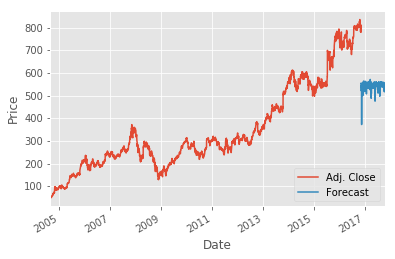

In [227]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4) # Positioning of the labels on the graph
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()